In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
data = pd.read_csv('../data/datacar_cleaned.csv')
print(data)

      year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2014         450000     145500     1            1             1      0   
1     2014         370000     120000     1            1             1      2   
2     2006         158000     140000     3            1             1      4   
3     2010         225000     127000     1            1             1      0   
4     2007         130000     120000     3            1             1      0   
...    ...            ...        ...   ...          ...           ...    ...   
8123  2013         320000     110000     3            1             1      0   
8124  2007         135000     119000     1            1             1      1   
8125  2009         382000     120000     1            1             1      0   
8126  2013         290000      25000     1            1             1      0   
8127  2013         290000      25000     1            1             1      0   

      mileage  engine  max_power  seats

In [4]:
print(data.dtypes)


year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


In [5]:
#Splitting the dataset into features and target variable
X= data.drop(columns=['selling_price'])
y= data['selling_price']

In [6]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(6502, 10)
(1626, 10)


In [8]:
# Model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
#predicting the target variable for the test set
y_pred = model.predict(X_test)

In [14]:
#Calculating the performance metrics
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
root_mse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", root_mse)
print("R2 Score:", r2)


Mean Squared Error: 205496162013.66153
Mean Absolute Error: 272396.67375019414
Root Mean Squared Error: 453316.845058356
R2 Score: 0.686497269276451


In [18]:
evalation = []
model = "Linear Regression"
evalation.append({
    'model': model, 
    'MAE': mae,
    'MSE' : mse,
    'r2score' : r2,
    'Root MSE' : root_mse
})
# Creating a DataFrame to display the evaluation metrics
ev_df = pd.DataFrame(evalation)
print(ev_df)
ev_df.to_csv('../data/evaluation.csv', index=False)



               model           MAE           MSE   r2score       Root MSE
0  Linear Regression  272396.67375  2.054962e+11  0.686497  453316.845058


Text(0.5, 1.0, 'True vs Predicted Values')

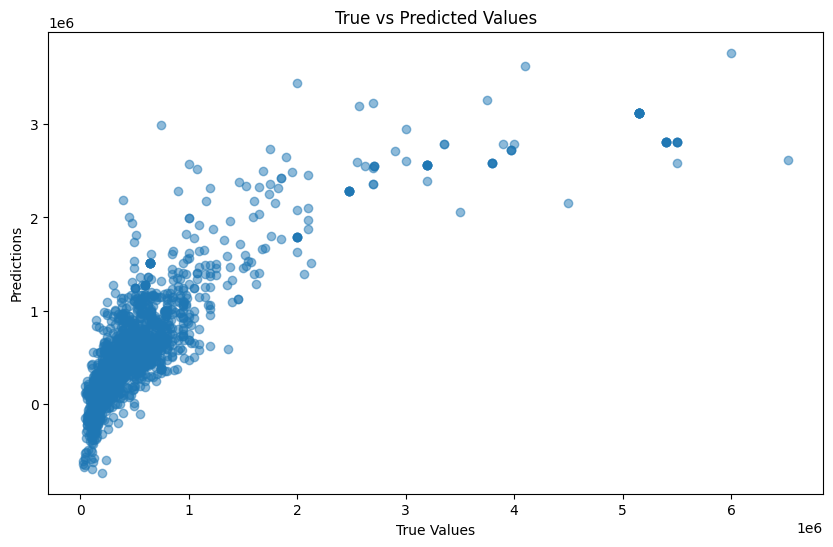

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')

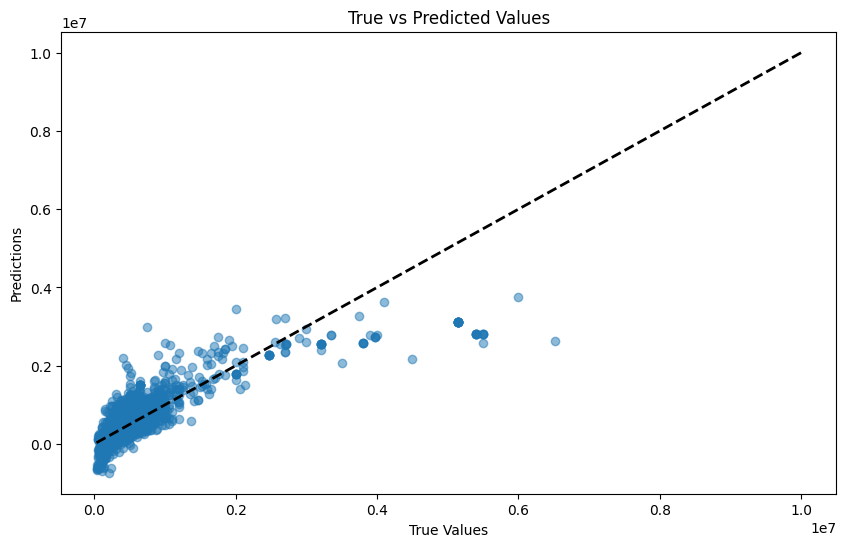

In [ ]:
#Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()
